<a href="https://colab.research.google.com/github/Safayat777/my_new/blob/main/DL_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Loading the MNIST data from keras.datasets

In [19]:
(X_train,Y_train),(X_test,Y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
print((X_train.shape,Y_train.shape,X_test.shape,Y_test.shape))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


In [6]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

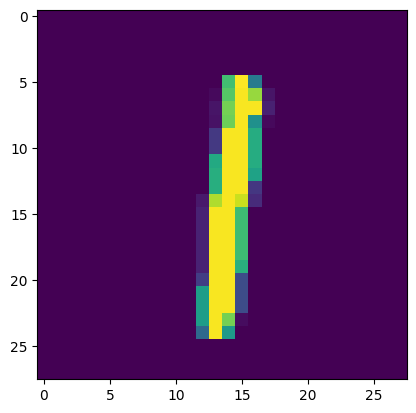

1


In [22]:
plt.imshow(X_train[40])
plt.show()
print(Y_train[40])

In [23]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [24]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Building the Neural Network

In [25]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# train the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8527 - loss: 0.5220
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9546 - loss: 0.1528
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9667 - loss: 0.1083
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9744 - loss: 0.0851
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9781 - loss: 0.0696
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9853 - loss: 0.0477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0408
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9894 - loss: 0.0344
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0297


Accuracy on Test data:

In [28]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 0.1445
0.9682000279426575


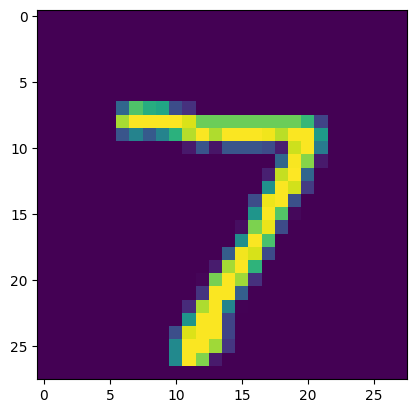

In [29]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [30]:
print(Y_test[0])

7


In [31]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [19]:
print(Y_pred.shape)

(10000, 10)


In [20]:
print(Y_pred[0])

[1.6624379e-01 4.8959639e-02 3.0307117e-01 9.9742925e-01 1.0577478e-05
 1.6849488e-01 1.7930073e-12 9.9999994e-01 2.8605679e-01 9.5573628e-01]


model.predict() gives the prediction probability of each class for that data point

In [32]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [55]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Confusin Matrix

In [34]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [24]:
print(conf_mat)

tf.Tensor(
[[ 960    0    0    2    3    2    4    0    2    7]
 [   1 1118    2    3    0    2    4    0    5    0]
 [   5    0  995   11    1    0    5    7    8    0]
 [   0    0    1  986    1    9    2    5    2    4]
 [   0    0    3    0  968    1    3    1    0    6]
 [   3    0    1    7    0  864    7    1    5    4]
 [   6    1    2    1    2    3  943    0    0    0]
 [   1    2   12    5    2    1    1  997    1    6]
 [   7    1    3   10    8    7   11    2  918    7]
 [   0    2    1    5   35    7    0    4    3  952]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

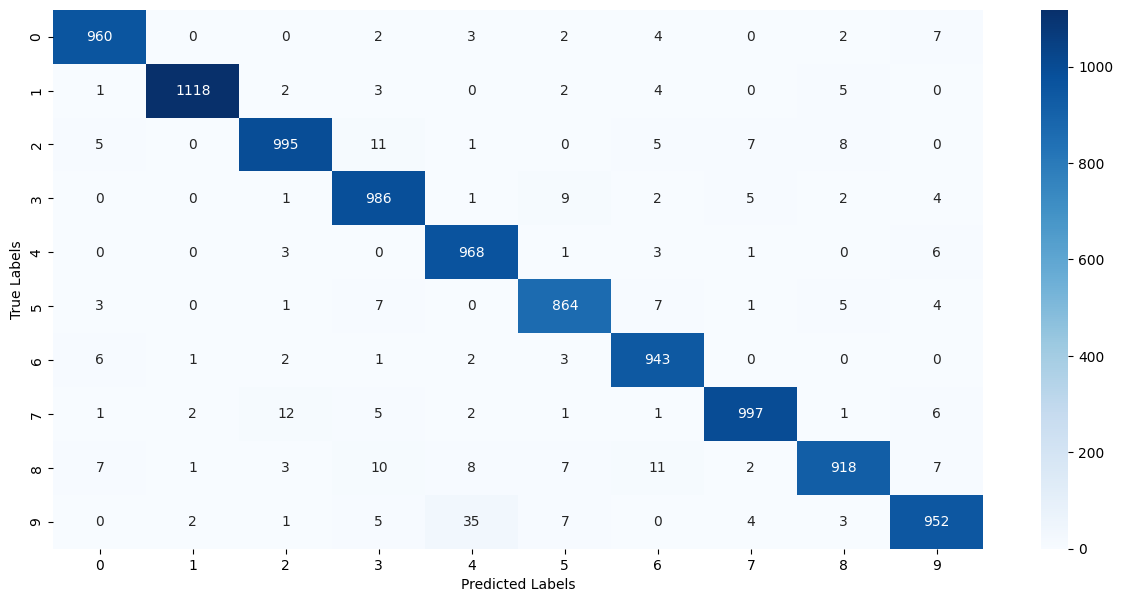

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [40]:
input_image_path = '/content/drive/MyDrive/DataSet/mnist_digit.png'

input_image = cv2.imread(input_image_path)

In [57]:
type(input_image)

numpy.ndarray

In [58]:
print(input_image)

[[[38 38 38]
  [36 36 36]
  [34 34 34]
  ...
  [26 26 26]
  [39 39 39]
  [20 20 20]]

 [[32 32 32]
  [30 30 30]
  [29 29 29]
  ...
  [27 27 27]
  [35 35 35]
  [23 23 23]]

 [[31 31 31]
  [30 30 30]
  [28 28 28]
  ...
  [29 29 29]
  [29 29 29]
  [28 28 28]]

 ...

 [[31 31 31]
  [31 31 31]
  [30 30 30]
  ...
  [28 28 28]
  [28 28 28]
  [30 30 30]]

 [[31 31 31]
  [31 31 31]
  [30 30 30]
  ...
  [28 28 28]
  [28 28 28]
  [30 30 30]]

 [[31 31 31]
  [31 31 31]
  [30 30 30]
  ...
  [28 28 28]
  [28 28 28]
  [30 30 30]]]


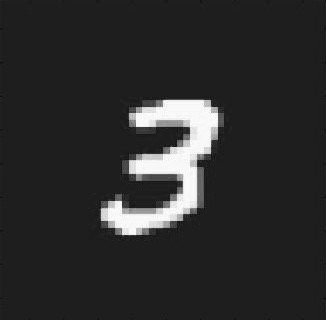

In [42]:
cv2_imshow(input_image)

In [43]:
input_image.shape

(320, 326, 3)

In [60]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [61]:
grayscale.shape

(320, 326)

In [62]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [63]:
input_image_resize.shape

(28, 28)

In [48]:
cv2_imshow(input_image_resize)

In [64]:
input_image_resize = input_image_resize/255

In [65]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [66]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[6.5079099e-04 5.9530247e-02 5.8006537e-01 9.2945009e-01 1.1601226e-04
  9.3441028e-03 5.3101836e-04 1.9125611e-04 8.7010545e-01 1.5180689e-01]]


In [67]:
input_pred_label = np.argmax(input_prediction)

In [68]:
print(input_pred_label)

3


Predictive System

Path of the image to be predicted: /content/drive/MyDrive/DataSet/mnist_digit1.png


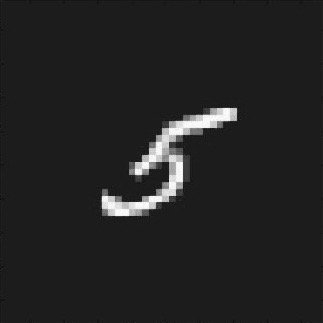

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The Handwritten Digit is recognised as  8


In [70]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)